# 梯度下降法

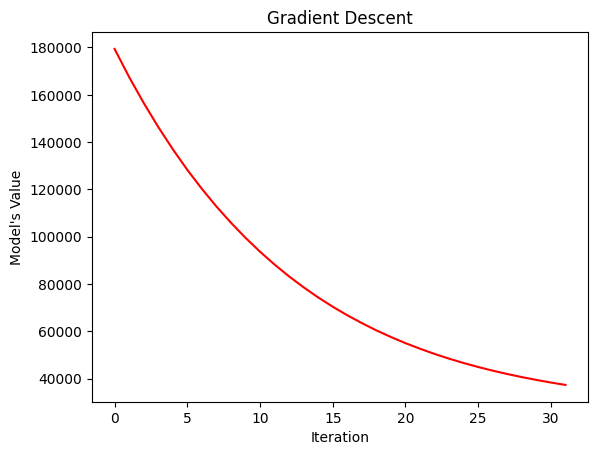

In [1]:
# 梯度下降法
import numpy as np
import cv2
import matplotlib.pyplot as plt

class denoise_solver:
    def __init__(self, I, lr=0.01, lamb=0.1):
        if I.max() > 1.0:
            I = I.astype(np.float32)
            I = I / 255.0
        # 初始图片
        self.I = I
        # 目标图片
        self.J = I
        # 学习率
        self.lr = lr
        # Lambda
        self.lamb = lamb
        
        self.w, self.h, self.c = I.shape
        
        self.J = (self.J).reshape((-1, 1))
        self.I = (self.I).reshape((-1, 1))
        
        self.model_val = [self._get_value()]
        
    def _img2vec(self):
        self.J = (self.J).reshape((-1, 1))
        
    def _vec2img(self):
        self.J = (self.J).reshape((self.w, self.h, self.c))
        
    def _cal_fidility(self):
        return np.sum((self.J - self.I) ** 2)
    
    def _cal_tv(self):
        self.J = (self.J).reshape((self.w, self.h, self.c))
        tv = np.sum(np.abs(self.J[1:, :, :] - self.J[:-1, :, :])) + np.sum(np.abs(self.J[:, 1:, :] - self.J[:, :-1, :]))
        self.J = (self.J).reshape((-1, 1))
        
        return tv
        
    def _get_value(self):
        return self._cal_fidility() + self._cal_tv()
    
    def _cal_fidility_grad(self):
        return 2 * (self.J - self.I)
    
    def _tv_grad_element(self, x, y, z):
        res = 0
        
        if x - 1 >= 0:
            if self.J[x, y, z] > self.J[x - 1, y, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x - 1, y, z]:
                res += -1
                
        if y - 1 >= 0:
            if self.J[x, y, z] > self.J[x, y - 1, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x, y - 1, z]:
                res += -1

        if x + 1 < self.J.shape[0]:
            if self.J[x, y, z] > self.J[x + 1, y, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x + 1, y, z]:
                res += -1
                
        if y + 1 < self.J.shape[1]:
            if self.J[x, y, z] > self.J[x, y + 1, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x, y + 1, z]:
                res += -1
                    
        return res
            
    def _cal_tv_grad(self):
        self.J = (self.J).reshape((self.w, self.h, self.c))
        tv_grad = np.zeros_like(self.J)
        
        w, h, c = self.J.shape
        for k in range(c):
            for i in range(w):
                for j in range(h):
                    tv_grad[i, j, k] = self._tv_grad_element(i, j, k)
        
        self.J = (self.J).reshape((-1, 1))
        return tv_grad.reshape((-1, 1))

    def _get_grad(self):
        return self._cal_fidility_grad() + self.lamb * self._cal_tv_grad()
    
    def forward(self):
        self.J = self.J - self.lr * self._get_grad()
        self.model_val.append(self._get_value())
        
    def _save_img(self, name):    
        save_img = self.J.copy()
        save_img = save_img.reshape((self.w, self.h, self.c))
        
        np.clip(save_img, a_min=0.0, a_max=1.0)
        save_img = save_img * 255.0

        cv2.imwrite('.\\GD\\%s.png' % name, save_img)
        
lena = cv2.imread('.\\lena_noise.png').astype(np.float32)
lena = lena / 255.0

solver = denoise_solver(lena, 0.01, 0.2)
for i in range(31):
    solver.forward()
    if (i % 10) == 0:
        solver._save_img('%02d'%i)
        
        
x = [i for i in range(32)]     
y = solver.model_val
fig, ax = plt.subplots()
ax.plot(x, y, color='red')
ax.set_xlabel('Iteration')
ax.set_ylabel("Model's Value")
ax.set_title('Gradient Descent')
plt.show()

# 牛顿法

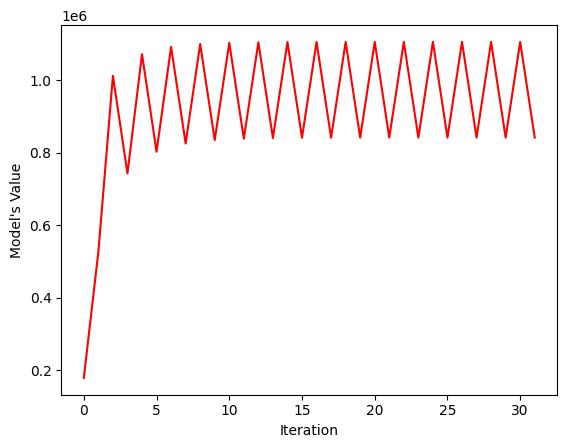

In [7]:
# 牛顿法
import numpy as np
import cv2
import matplotlib.pyplot as plt

class denoise_solver_newton:
    def __init__(self, I, lamb=0.1):
        if I.max() > 1.0:
            I = I.astype(np.float32)
            I = I / 255.0
        # 初始图片
        self.I = I
        # 目标图片
        self.J = I
        # Lambda
        self.lamb = lamb
        
        self.w, self.h, self.c = I.shape
        
        self.J = (self.J).reshape((-1, 1))
        self.I = (self.I).reshape((-1, 1))
        
        self.model_val = [self._get_value()]
    
    def _img2vec(self):
        self.J = (self.J).reshape((-1, 1))
        
    def _vec2img(self):
        self.J = (self.J).reshape((self.w, self.h, self.c))
        
    def _cal_fidility(self):
        return np.sum((self.J - self.I) ** 2)
    
    def _cal_tv(self):
        self.J = (self.J).reshape((self.w, self.h, self.c))
        tv = np.sum(np.abs(self.J[1:, :, :] - self.J[:-1, :, :])) + np.sum(np.abs(self.J[:, 1:, :] - self.J[:, :-1, :]))
        self.J = (self.J).reshape((-1, 1))
        
        return tv
        
    def _get_value(self):
        return self._cal_fidility() + self._cal_tv()
    
    def _cal_fidility_grad(self):
        return 2 * (self.J - self.I)
    
    def _tv_grad_element(self, x, y, z):
        res = 0
        
        if x - 1 >= 0:
            if self.J[x, y, z] > self.J[x - 1, y, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x - 1, y, z]:
                res += -1
                
        if y - 1 >= 0:
            if self.J[x, y, z] > self.J[x, y - 1, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x, y - 1, z]:
                res += -1

        if x + 1 < self.J.shape[0]:
            if self.J[x, y, z] > self.J[x + 1, y, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x + 1, y, z]:
                res += -1
                
        if y + 1 < self.J.shape[1]:
            if self.J[x, y, z] > self.J[x, y + 1, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x, y + 1, z]:
                res += -1
                    
        return res
            
    def _cal_tv_grad(self):
        self.J = (self.J).reshape((self.w, self.h, self.c))
        tv_grad = np.zeros_like(self.J)
        
        w, h, c = self.J.shape
        for k in range(c):
            for i in range(w):
                for j in range(h):
                    tv_grad[i, j, k] = self._tv_grad_element(i, j, k)
        
        self.J = (self.J).reshape((-1, 1))
        return tv_grad.reshape((-1, 1))
    
    def _get_grad(self):
        return self._cal_fidility_grad() + self.lamb * self._cal_tv_grad()
    
    def forward(self):
        self.J = self.J - 0.5 * self._get_grad()
        self.model_val.append(self._get_value())
        
    def _save_img(self, name):    
        save_img = self.J.copy()
        save_img = save_img.reshape((self.w, self.h, self.c))
        
        np.clip(save_img, a_min=0.0, a_max=1.0)
        save_img = save_img * 255.0

        cv2.imwrite('.\\Newton\\%s.png' % name, save_img)
        
        
lena = cv2.imread('.\\lena_noise.png').astype(np.float32)
lena = lena / 255.0

solver = denoise_solver_newton(lena, 0.2)
for i in range(31):
    solver.forward()
    if (i % 10) == 0:
        solver._save_img('%02d'%i)
   
x = [i for i in range(32)]     
y = solver.model_val
fig, ax = plt.subplots()
ax.plot(x, y, color='red')
ax.set_xlabel('Iteration')
ax.set_ylabel("Model's Value")
ax.set_title('')
plt.show()


# 修正的牛顿法

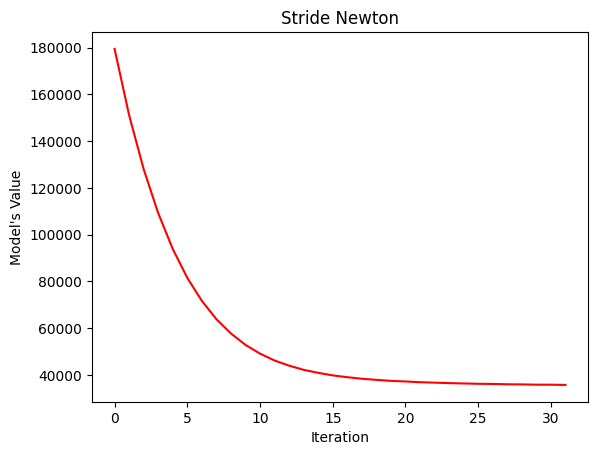

In [14]:
# 带步长的牛顿法
import numpy as np
import cv2

class denoise_solver_sd_newton:
    def __init__(self, I, lamb=0.1):
        if I.max() > 1.0:
            I = I.astype(np.float32)
            I = I / 255.0
        # 初始图片
        self.I = I
        # 目标图片
        self.J = I
        # Lambda
        self.lamb = lamb
        
        self.w, self.h, self.c = I.shape
        
        self.J = (self.J).reshape((-1, 1))
        self.I = (self.I).reshape((-1, 1))
        
        self.model_val = [self._get_value()]
    
    def _img2vec(self):
        self.J = (self.J).reshape((-1, 1))
        
    def _vec2img(self):
        self.J = (self.J).reshape((self.w, self.h, self.c))
        
    def _cal_fidility(self):
        return np.sum((self.J - self.I) ** 2)
    
    def _cal_tv(self):
        self.J = (self.J).reshape((self.w, self.h, self.c))
        tv = np.sum(np.abs(self.J[1:, :, :] - self.J[:-1, :, :])) + np.sum(np.abs(self.J[:, 1:, :] - self.J[:, :-1, :]))
        self.J = (self.J).reshape((-1, 1))
        
        return tv
        
    def _get_value(self):
        return self._cal_fidility() + self._cal_tv()
    
    def _cal_fidility_grad(self):
        return 2 * (self.J - self.I)
    
    def _tv_grad_element(self, x, y, z):
        res = 0
        
        if x - 1 >= 0:
            if self.J[x, y, z] > self.J[x - 1, y, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x - 1, y, z]:
                res += -1
                
        if y - 1 >= 0:
            if self.J[x, y, z] > self.J[x, y - 1, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x, y - 1, z]:
                res += -1

        if x + 1 < self.J.shape[0]:
            if self.J[x, y, z] > self.J[x + 1, y, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x + 1, y, z]:
                res += -1
                
        if y + 1 < self.J.shape[1]:
            if self.J[x, y, z] > self.J[x, y + 1, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x, y + 1, z]:
                res += -1
                    
        return res
            
    def _cal_tv_grad(self):
        self.J = (self.J).reshape((self.w, self.h, self.c))
        tv_grad = np.zeros_like(self.J)
        
        w, h, c = self.J.shape
        for k in range(c):
            for i in range(w):
                for j in range(h):
                    tv_grad[i, j, k] = self._tv_grad_element(i, j, k)
        
        self.J = (self.J).reshape((-1, 1))
        return tv_grad.reshape((-1, 1))

    def one_dimension_search(self, direction):
        stride = [0.05 * i for i in range(1, 21)]
        min_sd, min_val = 0, 1e10
        for sd in stride:
            self.J = self.J - sd * direction
            temp_val = self._get_value()
            if temp_val < min_val:
               min_sd = sd
               min_val = temp_val
            self.J = self.J + sd * direction
        return min_sd
    
    def _get_grad(self):
        return self._cal_fidility_grad() + self.lamb * self._cal_tv_grad()
    
    def forward(self):
        direction = -0.5 * self._get_grad()
        self.J = self.J + self.one_dimension_search(direction) * direction
        self.model_val.append(self._get_value())
        
    def _save_img(self, name):    
        save_img = self.J.copy()
        save_img = save_img.reshape((self.w, self.h, self.c))
        
        np.clip(save_img, a_min=0.0, a_max=1.0)
        save_img = save_img * 255.0

        cv2.imwrite('.\\StrideNewton\\%s.png' % name, save_img)
        
        
lena = cv2.imread('.\\lena_noise.png').astype(np.float32)
lena = lena / 255.0

solver = denoise_solver_sd_newton(lena, 0.2)
for i in range(31):
    solver.forward()
    if (i % 5) == 0:
        solver._save_img('%02d'%i)
        
x = [i for i in range(32)]     
y = solver.model_val
fig, ax = plt.subplots()
ax.plot(x, y, color='red')
ax.set_xlabel('Iteration')
ax.set_ylabel("Model's Value")
ax.set_title('Stride Newton')
plt.show()

# 共轭梯度法

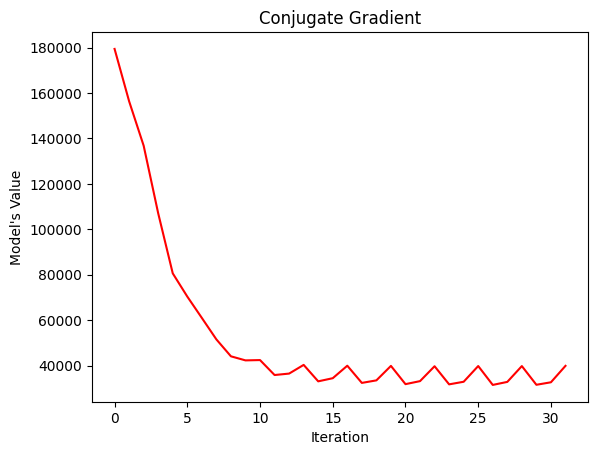

In [3]:
# 共轭梯度法
import numpy as np
import cv2

class denoise_solver_conj:
    def __init__(self, I, lamb=0.1):
        if I.max() > 1.0:
            I = I.astype(np.float32)
            I = I / 255.0
        # 初始图片
        self.I = I
        # 目标图片
        self.J = I
        # Lambda
        self.lamb = lamb
        
        self.w, self.h, self.c = I.shape
        
        self.J = (self.J).reshape((-1, 1))
        self.I = (self.I).reshape((-1, 1))
        
        self.d = -self._get_grad()
        
        self.model_val = [self._get_value()]
        
    def _cal_fidility(self):
        return np.sum((self.J - self.I) ** 2)
    
    def _cal_tv(self):
        self.J = (self.J).reshape((self.w, self.h, self.c))
        tv = np.sum(np.abs(self.J[1:, :, :] - self.J[:-1, :, :])) + np.sum(np.abs(self.J[:, 1:, :] - self.J[:, :-1, :]))
        self.J = (self.J).reshape((-1, 1))
        
        return tv
        
    def _get_value(self):
        return self._cal_fidility() + self._cal_tv()
    
    def _cal_fidility_grad(self):
        return 2 * (self.J - self.I)
    
    def _tv_grad_element(self, x, y, z):
        res = 0
        
        if x - 1 >= 0:
            if self.J[x, y, z] > self.J[x - 1, y, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x - 1, y, z]:
                res += -1
                
        if y - 1 >= 0:
            if self.J[x, y, z] > self.J[x, y - 1, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x, y - 1, z]:
                res += -1

        if x + 1 < self.J.shape[0]:
            if self.J[x, y, z] > self.J[x + 1, y, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x + 1, y, z]:
                res += -1
                
        if y + 1 < self.J.shape[1]:
            if self.J[x, y, z] > self.J[x, y + 1, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x, y + 1, z]:
                res += -1
                    
        return res
            
    def _cal_tv_grad(self):
        self.J = (self.J).reshape((self.w, self.h, self.c))
        tv_grad = np.zeros_like(self.J)
        
        w, h, c = self.J.shape
        for k in range(c):
            for i in range(w):
                for j in range(h):
                    tv_grad[i, j, k] = self._tv_grad_element(i, j, k)
        
        self.J = (self.J).reshape((-1, 1))
        return tv_grad.reshape((-1, 1))

    def one_dimension_search(self, direction):
        stride = [0.02 * i for i in range(1, 51)]
        min_sd, min_val = 0, 1e10
        for sd in stride:
            self.J = self.J - sd * direction
            temp_val = self._get_value()
            if temp_val < min_val:
               min_sd = sd
               min_val = temp_val
            self.J = self.J + sd * direction
        return min_sd
    
    def _get_grad(self):
        return self._cal_fidility_grad() + self.lamb * self._cal_tv_grad()
    
    def forward(self):
        g = self._get_grad()
        # alpha = -(np.dot(g.T, self.d) / np.dot(2 * self.d.T, self.d))        
        # self.J = self.J + alpha * self.d
        self.J = self.J + self.one_dimension_search(self.d) * self.d
        g_ = self._get_grad()
        beta = np.dot(g_.T, g_) / np.dot(g.T, g)
        self.d = -g_ + beta * self.d
        
        self.model_val.append(self._get_value())
        
    def _save_img(self, name):    
        save_img = self.J.copy()
        save_img = save_img.reshape((self.w, self.h, self.c))
        
        np.clip(save_img, a_min=0.0, a_max=1.0)
        save_img = save_img * 255.0

        cv2.imwrite('.\\ConjDirection\\%s.png' % name, save_img)
        
    def _reset_dir(self):
        self.d = -self._get_grad()
        
        
lena = cv2.imread('.\\lena_noise.png').astype(np.float32)
lena = lena / 255.0

solver = denoise_solver_conj(lena, 0.2)
for i in range(31):
    solver.forward()
    if i % 5 == 0:
        solver._save_img('%02d'%i)
    if i % 3 == 0:
        solver._reset_dir()
        
x = [i for i in range(32)]     
y = solver.model_val
fig, ax = plt.subplots()
ax.plot(x, y, color='red')
ax.set_xlabel('Iteration')
ax.set_ylabel("Model's Value")
ax.set_title('Conjugate Gradient')
plt.show()

# 拟牛顿法————秩一算法

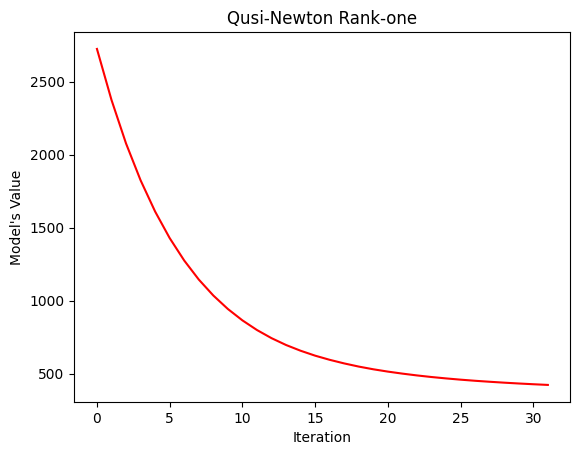

In [19]:
# 拟牛顿法 秩一
import numpy as np
import cv2

class denoise_solver_rank1:
    def __init__(self, I, lamb=0.1):
        if I.max() > 1.0:
            I = I.astype(np.float32)
            I = I / 255.0
        # 初始图片
        self.I = I
        # 目标图片
        self.J = I
        # Lambda
        self.lamb = lamb
        
        self.w, self.h, self.c = I.shape
        
        self.J = (self.J).reshape((-1, 1))
        self.I = (self.I).reshape((-1, 1))
        
        self.Hessian = np.zeros((self.I.shape[0], self.I.shape[0]))
        for k in range(self.I.shape[0]):
            self.Hessian[k, k] = 1
        
        self.model_val = [self._get_value()]
        
    def _cal_fidility(self):
        return np.sum((self.J - self.I) ** 2)
    
    def _cal_tv(self):
        self.J = (self.J).reshape((self.w, self.h, self.c))
        tv = np.sum(np.abs(self.J[1:, :, :] - self.J[:-1, :, :])) + np.sum(np.abs(self.J[:, 1:, :] - self.J[:, :-1, :]))
        self.J = (self.J).reshape((-1, 1))
        
        return tv
        
    def _get_value(self):
        return self._cal_fidility() + self._cal_tv()
    
    def _cal_fidility_grad(self):
        return 2 * (self.J - self.I)
    
    def _tv_grad_element(self, x, y, z):
        res = 0
        
        if x - 1 >= 0:
            if self.J[x, y, z] > self.J[x - 1, y, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x - 1, y, z]:
                res += -1
                
        if y - 1 >= 0:
            if self.J[x, y, z] > self.J[x, y - 1, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x, y - 1, z]:
                res += -1

        if x + 1 < self.J.shape[0]:
            if self.J[x, y, z] > self.J[x + 1, y, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x + 1, y, z]:
                res += -1
                
        if y + 1 < self.J.shape[1]:
            if self.J[x, y, z] > self.J[x, y + 1, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x, y + 1, z]:
                res += -1
                    
        return res
            
    def _cal_tv_grad(self):
        self.J = (self.J).reshape((self.w, self.h, self.c))
        tv_grad = np.zeros_like(self.J)
        
        w, h, c = self.J.shape
        for k in range(c):
            for i in range(w):
                for j in range(h):
                    tv_grad[i, j, k] = self._tv_grad_element(i, j, k)
        
        self.J = (self.J).reshape((-1, 1))
        return tv_grad.reshape((-1, 1))

    def one_dimension_search(self, direction):
        stride = [0.02 * i for i in range(1, 51)]
        min_sd, min_val = 0, 1e10
        for sd in stride:
            self.J = self.J - sd * direction
            temp_val = self._get_value()
            if temp_val < min_val:
               min_sd = sd
               min_val = temp_val
            self.J = self.J + sd * direction
        return min_sd
    
    def _get_grad(self):
        return self._cal_fidility_grad() + self.lamb * self._cal_tv_grad()
    
    def forward(self):
        # print(self.Hessian.shape)
        direction = -np.matmul(self.Hessian, self._get_grad())
        
        J1 = self.J.copy()
        g1 = self._get_grad()
        self.J = self.J + self.one_dimension_search(direction) * direction
        g2 = self._get_grad()
        J2 = self.J.copy()
        
        delta_x = J2 - J1
        delta_g = g2 - g1
        
        self.Hessian = self.Hessian + \
            np.matmul((delta_x - np.matmul(self.Hessian, delta_g)), (delta_x - np.matmul(self.Hessian, delta_g)).T) / np.matmul((delta_x - np.matmul(self.Hessian, delta_g)).T, delta_g)
        
        self.model_val.append(self._get_value())
        
    def _save_img(self, name):    
        save_img = self.J.copy()
        save_img = save_img.reshape((self.w, self.h, self.c))
        
        np.clip(save_img, a_min=0.0, a_max=1.0)
        save_img = save_img * 255.0

        cv2.imwrite('.\\rank1\\%s.png' % name, save_img)
        
        
        
lena = cv2.imread('.\\small_lena.png').astype(np.float32)
lena = lena / 255.0

solver = denoise_solver_rank1(lena, 0.2)
for i in range(31):
    solver.forward()
    if i % 5 == 0:
        solver._save_img('%02d'%i)
        
x = [i for i in range(32)]     
y = solver.model_val
fig, ax = plt.subplots()
ax.plot(x, y, color='red')
ax.set_xlabel('Iteration')
ax.set_ylabel("Model's Value")
ax.set_title('Qusi-Newton Rank-one')
plt.show()

# 拟牛顿法————秩二算法

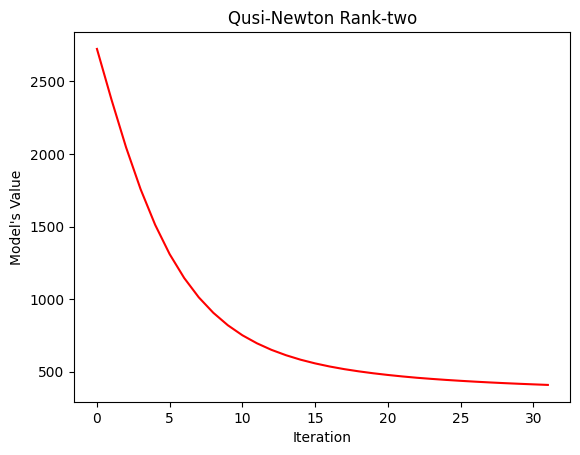

In [21]:
import numpy as np
import cv2

class denoise_solver_rank2:
    def __init__(self, I, lamb=0.1):
        if I.max() > 1.0:
            I = I.astype(np.float32)
            I = I / 255.0
        # 初始图片
        self.I = I
        # 目标图片
        self.J = I
        # Lambda
        self.lamb = lamb
        
        self.w, self.h, self.c = I.shape
        
        self.J = (self.J).reshape((-1, 1))
        self.I = (self.I).reshape((-1, 1))
        
        self.Hessian = np.zeros((self.I.shape[0], self.I.shape[0]))
        for k in range(self.I.shape[0]):
            self.Hessian[k, k] = 1
        
        self.model_val = [self._get_value()]
        
    def _cal_fidility(self):
        return np.sum((self.J - self.I) ** 2)
    
    def _cal_tv(self):
        self.J = (self.J).reshape((self.w, self.h, self.c))
        tv = np.sum(np.abs(self.J[1:, :, :] - self.J[:-1, :, :])) + np.sum(np.abs(self.J[:, 1:, :] - self.J[:, :-1, :]))
        self.J = (self.J).reshape((-1, 1))
        
        return tv
        
    def _get_value(self):
        return self._cal_fidility() + self._cal_tv()
    
    def _cal_fidility_grad(self):
        return 2 * (self.J - self.I)
    
    def _tv_grad_element(self, x, y, z):
        res = 0
        
        if x - 1 >= 0:
            if self.J[x, y, z] > self.J[x - 1, y, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x - 1, y, z]:
                res += -1
                
        if y - 1 >= 0:
            if self.J[x, y, z] > self.J[x, y - 1, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x, y - 1, z]:
                res += -1

        if x + 1 < self.J.shape[0]:
            if self.J[x, y, z] > self.J[x + 1, y, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x + 1, y, z]:
                res += -1
                
        if y + 1 < self.J.shape[1]:
            if self.J[x, y, z] > self.J[x, y + 1, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x, y + 1, z]:
                res += -1
                    
        return res
            
    def _cal_tv_grad(self):
        self.J = (self.J).reshape((self.w, self.h, self.c))
        tv_grad = np.zeros_like(self.J)
        
        w, h, c = self.J.shape
        for k in range(c):
            for i in range(w):
                for j in range(h):
                    tv_grad[i, j, k] = self._tv_grad_element(i, j, k)
        
        self.J = (self.J).reshape((-1, 1))
        return tv_grad.reshape((-1, 1))

    def one_dimension_search(self, direction):
        stride = [0.02 * i for i in range(1, 51)]
        min_sd, min_val = 0, 1e10
        for sd in stride:
            self.J = self.J - sd * direction
            temp_val = self._get_value()
            if temp_val < min_val:
               min_sd = sd
               min_val = temp_val
            self.J = self.J + sd * direction
        return min_sd
    
    def _get_grad(self):
        return self._cal_fidility_grad() + self.lamb * self._cal_tv_grad()
    
    def forward(self):
        # print(self.Hessian.shape)
        direction = -np.matmul(self.Hessian, self._get_grad())
        
        J1 = self.J.copy()
        g1 = self._get_grad()
        self.J = self.J + self.one_dimension_search(direction) * direction
        g2 = self._get_grad()
        J2 = self.J.copy()
        
        delta_x = J2 - J1
        delta_g = g2 - g1
        
        self.Hessian = self.Hessian + \
            np.dot(delta_x, delta_x.T) / np.dot(delta_x.T, delta_g) - \
                np.matmul(np.matmul(self.Hessian, delta_g), np.matmul(self.Hessian, delta_g).T) / np.dot(np.matmul(delta_g.T, (self.Hessian).T), delta_g)
            
        self.model_val.append(self._get_value())
        
    def _save_img(self, name):    
        save_img = self.J.copy()
        save_img = save_img.reshape((self.w, self.h, self.c))
        
        np.clip(save_img, a_min=0.0, a_max=1.0)
        save_img = save_img * 255.0

        cv2.imwrite('.\\rank2\\%s.png' % name, save_img)
        
        
        
lena = cv2.imread('.\\small_lena.png').astype(np.float32)
lena = lena / 255.0

solver = denoise_solver_rank2(lena, 0.2)
for i in range(31):
    solver.forward()
    if i % 5 == 0:
        solver._save_img('%02d'%i)
        
x = [i for i in range(32)]     
y = solver.model_val
fig, ax = plt.subplots()
ax.plot(x, y, color='red')
ax.set_xlabel('Iteration')
ax.set_ylabel("Model's Value")
ax.set_title('Qusi-Newton Rank-two')
plt.show()

# 拟牛顿法————BFGS算法

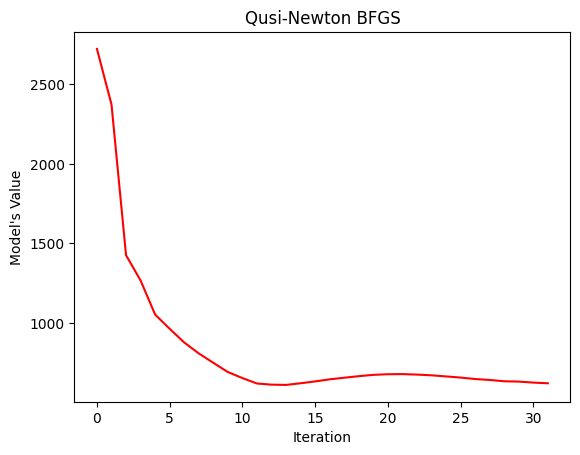

In [26]:
# 拟牛顿法 BFGS
import numpy as np
import cv2

class denoise_solver_bfgs:
    def __init__(self, I, lamb=0.1):
        if I.max() > 1.0:
            I = I.astype(np.float32)
            I = I / 255.0
        # 初始图片
        self.I = I
        # 目标图片
        self.J = I
        # Lambda
        self.lamb = lamb
        
        self.w, self.h, self.c = I.shape
        
        self.J = (self.J).reshape((-1, 1))
        self.I = (self.I).reshape((-1, 1))
        
        self.Hessian = np.zeros((self.I.shape[0], self.I.shape[0]))
        for k in range(self.I.shape[0]):
            self.Hessian[k, k] = 1
        
        self.model_val = [self._get_value()]
        
    def _cal_fidility(self):
        return np.sum((self.J - self.I) ** 2)
    
    def _cal_tv(self):
        self.J = (self.J).reshape((self.w, self.h, self.c))
        tv = np.sum(np.abs(self.J[1:, :, :] - self.J[:-1, :, :])) + np.sum(np.abs(self.J[:, 1:, :] - self.J[:, :-1, :]))
        self.J = (self.J).reshape((-1, 1))
        
        return tv
        
    def _get_value(self):
        return self._cal_fidility() + self._cal_tv()
    
    def _cal_fidility_grad(self):
        return 2 * (self.J - self.I)
    
    def _tv_grad_element(self, x, y, z):
        res = 0
        
        if x - 1 >= 0:
            if self.J[x, y, z] > self.J[x - 1, y, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x - 1, y, z]:
                res += -1
                
        if y - 1 >= 0:
            if self.J[x, y, z] > self.J[x, y - 1, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x, y - 1, z]:
                res += -1

        if x + 1 < self.J.shape[0]:
            if self.J[x, y, z] > self.J[x + 1, y, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x + 1, y, z]:
                res += -1
                
        if y + 1 < self.J.shape[1]:
            if self.J[x, y, z] > self.J[x, y + 1, z]:
                res += 1
            elif self.J[x, y, z] < self.J[x, y + 1, z]:
                res += -1
                    
        return res
            
    def _cal_tv_grad(self):
        self.J = (self.J).reshape((self.w, self.h, self.c))
        tv_grad = np.zeros_like(self.J)
        
        w, h, c = self.J.shape
        for k in range(c):
            for i in range(w):
                for j in range(h):
                    tv_grad[i, j, k] = self._tv_grad_element(i, j, k)
        
        self.J = (self.J).reshape((-1, 1))
        return tv_grad.reshape((-1, 1))

    def one_dimension_search(self, direction):
        stride = [0.02 * i for i in range(1, 51)]
        min_sd, min_val = 0, 1e10
        for sd in stride:
            self.J = self.J - sd * direction
            temp_val = self._get_value()
            if temp_val < min_val:
               min_sd = sd
               min_val = temp_val
            self.J = self.J + sd * direction
        return min_sd
    
    def _get_grad(self):
        return self._cal_fidility_grad() + self.lamb * self._cal_tv_grad()
    
    def forward(self):
        # print(self.Hessian.shape)
        direction = -np.matmul(self.Hessian, self._get_grad())
        
        J1 = self.J.copy()
        g1 = self._get_grad()
        self.J = self.J + self.one_dimension_search(direction) * direction
        g2 = self._get_grad()
        J2 = self.J.copy()
        
        delta_x = J2 - J1
        delta_g = g2 - g1
        
        self.Hessian = self.Hessian + \
            (1 + np.dot(np.matmul(delta_g.T, self.Hessian), delta_g) / np.dot(delta_g.T, delta_x)) * (np.dot(delta_x, delta_x.T) / np.dot(delta_x.T, delta_g)) - \
                (np.matmul(np.matmul(self.Hessian, delta_g), delta_x.T) + np.matmul(np.matmul(self.Hessian, delta_g), delta_x.T).T) / np.dot(delta_g.T, delta_x)
            
        self.model_val.append(self._get_value())
        
    def _save_img(self, name):    
        save_img = self.J.copy()
        save_img = save_img.reshape((self.w, self.h, self.c))
        
        np.clip(save_img, a_min=0.0, a_max=1.0)
        save_img = save_img * 255.0

        cv2.imwrite('.\\BFGS\\%s.png' % name, save_img)
        
        
        
lena = cv2.imread('.\\small_lena.png').astype(np.float32)
lena = lena / 255.0

solver = denoise_solver_bfgs(lena, 0.2)
for i in range(31):
    solver.forward()
    if i % 5 == 0:
        solver._save_img('%02d'%i)
        
x = [i for i in range(32)]     
y = solver.model_val
fig, ax = plt.subplots()
ax.plot(x, y, color='red')
ax.set_xlabel('Iteration')
ax.set_ylabel("Model's Value")
ax.set_title('Qusi-Newton BFGS')
plt.show()